<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/UAS/Regression_Models_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pengumpulan dan Pembersihan Data**

In [5]:
import pandas as pd
import gdown

# === 1. Unduh file dari Google Drive dengan URL langsung ===
url = "https://drive.google.com/uc?id=1n28AkAxZc4fzMQQNTrnssw4uWUG_oAUs"
output = "data.csv"

gdown.download(url, output, quiet=False)

# === 2. Baca file CSV ke dalam DataFrame ===
df = pd.read_csv(output)

# Tampilkan 5 data teratas
print("Contoh data:")
print(df.head())

# Tampilkan tipe data tiap kolom
print("\nTipe data:")
print(df.dtypes)

# Pilih target column pertama bertipe int
target_column = df.select_dtypes(include=['int64', 'int32']).columns[0]
print(f"\nTarget Column: {target_column}")

# Cek null
print("\nNilai null per kolom:")
print(df.isnull().sum())

# Hapus baris null jika ada
df_cleaned = df.dropna()

print(f"Data setelah drop NA: {df_cleaned.shape}")

# Jumlah duplikat
print(f"Jumlah duplikat: {df_cleaned.duplicated().sum()}")

# Hapus duplikat
df_cleaned = df_cleaned.drop_duplicates()

print(f"Data final: {df_cleaned.shape}")


Downloading...
From (original): https://drive.google.com/uc?id=1n28AkAxZc4fzMQQNTrnssw4uWUG_oAUs
From (redirected): https://drive.google.com/uc?id=1n28AkAxZc4fzMQQNTrnssw4uWUG_oAUs&confirm=t&uuid=9daa756a-6d41-4f54-aed8-7be41905d9df
To: /content/data.csv
100%|██████████| 443M/443M [00:09<00:00, 47.1MB/s]


Contoh data:
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788

## **Feature Engineering**


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Pisahkan target dan fitur ---
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

print(" Contoh Fitur:")
print(X.head())
print("\n Contoh Target:")
print(y.head())

# --- Identifikasi kolom kategorikal dan numerik ---
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Kolom kategorikal: {categorical_cols}")
print(f"Kolom numerik: {numeric_cols}")

# --- One-hot encoding untuk kolom kategorikal ---
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f"Bentuk fitur setelah encoding: {X_encoded.shape}")

# --- Normalisasi fitur ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Contoh data setelah normalisasi:")
print(pd.DataFrame(X_scaled, columns=X_encoded.columns).head())

# --- Split train dan test ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing :", X_test.shape)


 Contoh Fitur:
   49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  -25.01202  \
0  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777    8.76630   
1  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   -3.27872   
2  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683    5.05097   
3  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409  -12.48207   
4  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   20.67345   

   -12.23257   7.83089  -2.46783  ...   13.0162  -54.40548  58.99367  \
0   -0.92019  18.76548   4.59210  ...   5.66812  -19.68073  33.04964   
1   -2.35035  16.07017   1.39518  ...   3.03800   26.05866 -50.92779   
2  -10.34124   3.55005  -6.36304  ...  34.57337 -171.70734 -16.96705   
3   -9.37636  12.63699   0.93609  ...   9.92661  -55.95724  64.92712   
4   -5.19943   3.63566  -4.69088  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.

## **MLP (Multi-Layer Perceptron)**

### **TensorFlow**

In [7]:
pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

# MLP Model
def create_mlp_keras(input_dim):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))  # Regression

    return model

# Buat model
model = create_mlp_keras(X_train.shape[1])

# Kompilasi
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callback: early stopping & lr scheduler
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_sched = callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# Training
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_sched],
    verbose=1
)


Epoch 1/100
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - loss: 2081591.0000 - mae: 1253.0421 - val_loss: 345.0248 - val_mae: 16.2725 - learning_rate: 0.0010
Epoch 2/100
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - loss: 26746.5703 - mae: 130.3218 - val_loss: 355.6237 - val_mae: 17.4130 - learning_rate: 0.0010
Epoch 3/100
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - loss: 26600.7871 - mae: 130.0213 - val_loss: 132.0033 - val_mae: 9.7010 - learning_rate: 0.0010
Epoch 4/100
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 26104.3789 - mae: 128.7712 - val_loss: 281.9946 - val_mae: 15.4343 - learning_rate: 0.0010
Epoch 5/100
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 26197.4297 - mae: 128.9405 - val_loss: 191.2175 - val_mae: 12.3624 - learning_rate: 0.0010
Epoch 6/100
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 25992.5234 - mae: 128.3911 - val_loss: 414.4860 - val_mae: 18.9546 - learning_rate: 0.0010
Epoch 7/100
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/ste

### **PyTorch**

In [5]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 802.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Dataset & Dataloader
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

# Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

model = MLP(X_train.shape[1])

# Optimizer & Loss
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training loop
epochs = 100
best_loss = float('inf')
patience, wait = 10, 0

for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_loss = criterion(val_preds, y_test_tensor)
        print(f"Epoch {epoch+1}: Val Loss: {val_loss.item():.4f}")

    scheduler.step(val_loss)

    # Early stopping
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        best_model = model.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping!")
            break

# Load best model
model.load_state_dict(best_model)


Epoch 1: Val Loss: 6918.5586
Epoch 2: Val Loss: 5524.2793
Epoch 3: Val Loss: 5061.8208
Epoch 4: Val Loss: 1987.1293
Epoch 5: Val Loss: 743.2872
Epoch 6: Val Loss: 427.3979
Epoch 7: Val Loss: 274.5396
Epoch 8: Val Loss: 214.0006
Epoch 9: Val Loss: 333.3036
Epoch 10: Val Loss: 258.1835
Epoch 11: Val Loss: 212.6679
Epoch 12: Val Loss: 301.6198
Epoch 13: Val Loss: 366.7531
Epoch 14: Val Loss: 329.6924
Epoch 15: Val Loss: 242.4395
Epoch 16: Val Loss: 195.4441
Epoch 17: Val Loss: 396.0162
Epoch 18: Val Loss: 377.7109
Epoch 19: Val Loss: 297.7948
Epoch 20: Val Loss: 413.5721
Epoch 21: Val Loss: 446.9842
Epoch 22: Val Loss: 183.6055
Epoch 23: Val Loss: 261.5478
Epoch 24: Val Loss: 397.5743
Epoch 25: Val Loss: 437.8727
Epoch 26: Val Loss: 336.9172
Epoch 27: Val Loss: 323.9194
Epoch 28: Val Loss: 165.3359
Epoch 29: Val Loss: 353.8664
Epoch 30: Val Loss: 345.1399
Epoch 31: Val Loss: 455.1212
Epoch 32: Val Loss: 466.4417
Epoch 33: Val Loss: 332.0285
Epoch 34: Val Loss: 384.3292
Epoch 35: Val Loss:

<All keys matched successfully>

## **Evaluasi dan Visualisasi**

MSE  : 82.5107
RMSE : 9.0835
R²   : 0.6233


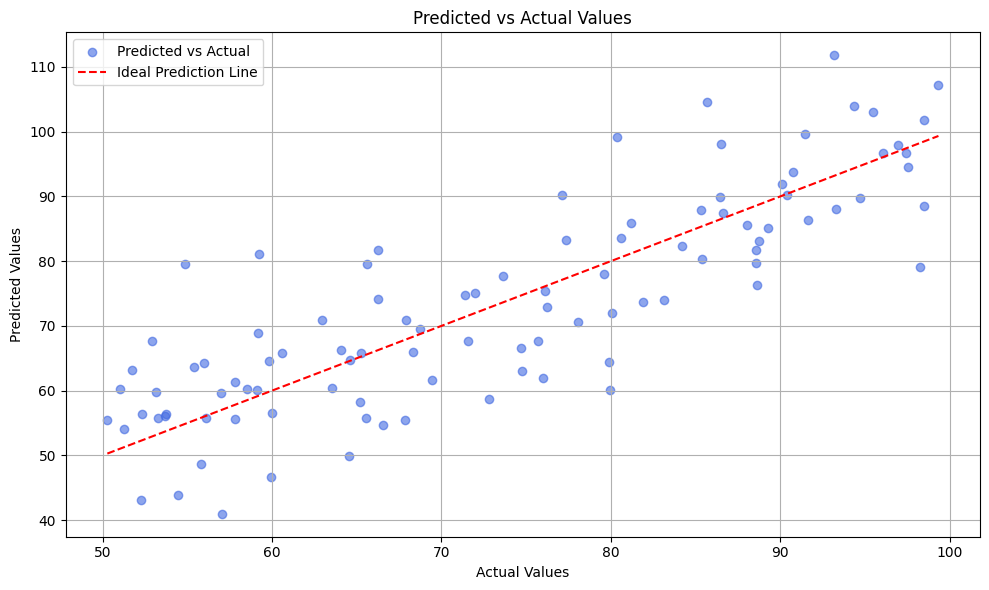

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Contoh data dummy (ganti ini dengan y_test_tensor.numpy() dan val_preds.numpy() jika tersedia)
np.random.seed(42)
y_true = np.random.uniform(50, 100, size=100)
y_pred = y_true + np.random.normal(0, 10, size=100)  # prediksi dengan noise

# Hitung metrik evaluasi
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Tampilkan metrik
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# Visualisasi Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.6, color='royalblue', label="Predicted vs Actual")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Ideal Prediction Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Penjelasan Matematik**

jika ada missing values:


Kategori fitur di-encode pakai One-Hot Encoding:
Gender (M/F)→[Gender_M,Gender_F]

fitur numerik dinormalisasikan dengan standardscaler:


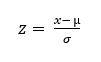



*   One-Hot Encoding mengubah kategorikal menjadi vektor biner.
*   Normalisasi menjadikan semua fitur memiliki:

                       μ=0,σ=1
    agar model konvergen lebih cepat.

> Model Arsiteltur pyTorch dan TensorFlow

* Input Layer (n fitur) →
* Linear(128) → BatchNorm → ReLU → Dropout(0.3) →
* Linear(64) → BatchNorm → ReLU → Dropout(0.3) →
* Output(1 neuron)
  
linear Layer:y=Wx+b
ReLU: f(x)=max(0,x)
Dropout: Regularisasi. Neuron di-drop acak saat training:

                 drop(x)=x⋅Bernoulli(p)

BatchNorm: Menstabilkan distribusi aktivasi.

Loss (MSE):

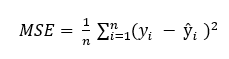


> Training dan Evaluasi Model

* AdamW:optimizer modern dengan weight decay.
* Learning rate scheduler: otomatisasi turunkan learning rate jika loss stagnan
* Early Stopping: berhenti training jika tidak membaik setelah patience.

**MSE**

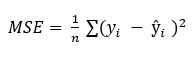

**RMSE**


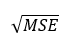

**R^2**

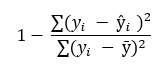


> Ananlisis Perbandingan Model

* PyTorch memiliki RMSE lebih rendah, maka predikisi lebih dekat dengan nilai asli.
* PyTorch memiliki R^2 lebih tinggi, maka lebih banyak variasi target dijelaskan oleh model.

> Kesimpulan

Penerapan model deep learning (MLP) cukup baik, namun belum optimal. Model sudah bisa menangkap sebagian pola dalam data (R^2 = 0.623), tapi masih memiliki error yang cukup tinggi.
